# 202 Calculate NNCE

In this notebook, we will assess potential NNCE requirements to achieve a decline of 0.1C (TCRE). For stabilisation, we will use the likely range of ZEC from WG1, but only apply the best estimate of TCRE. The TCRE distribution is from the notebook `201_derive_tcre_wg1.ipynb`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

Step 1: Read in the necessary data

In [2]:
tcre = np.load(
    Path(
        'processed_data/201_tcre.npy'
    )
)

In [3]:
tcre

array([1.07082168, 1.07673193, 1.64974805, ..., 0.74326792, 2.22381522,
       1.85970801])

Step 2: We need to convert the units from PgC to GtCO2

In [4]:
tcre_C_per_GtCO2 = tcre / 1000 / (44/12)

Step 3: Now, we calculate the net negative emissions. This is basically derived by the required cooling (0.1C) divided by the TCRE.

In [5]:
nnce_initial = -0.1 / tcre_C_per_GtCO2

Step 4: Let us plot this out for a quick check.

(array([4.82316790e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.82316790e-07,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

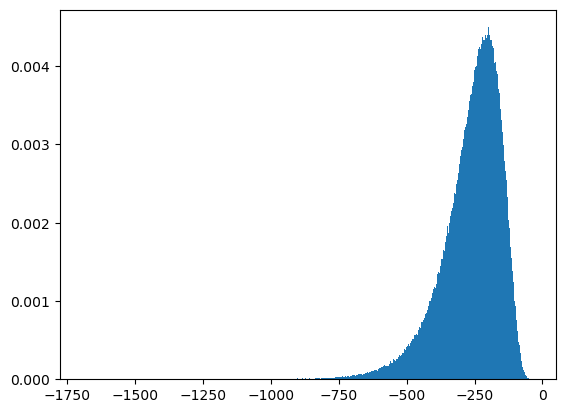

In [6]:
fig, ax = plt.subplots()

# Step 4.1: Plot a histogram with the net negative emissions
ax.hist(
    nnce_initial,
    density=True,
    bins=800
)

Step 5: Calculate the limit for ZEC.

TODO: Discuss if we will use some distribution-based approach here.

In [7]:
nnce_zec = -0.3 / np.average(tcre_C_per_GtCO2)

In [8]:
nnce_zec

-667.6816425515701

Step 6: Save out the NNCE estimates for future use.

In [9]:
np.save(
    Path(
        'processed_data/202_nnce_tcre.npy'
    ),
    nnce_initial
)

In [10]:
np.save(
    Path(
        'processed_data/202_nnce_zec.npy'
    ),
    nnce_zec
)